In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sn
import matplotlib.pyplot as plt


## Project definition 

Objective:To predict the likelihood of BRICS nations adopting a cryptocurrency based on economic, political, social, and technological indicators.

Scope:Analysis of historical data, current policies, economic indicators, and public sentiment regarding cryptocurrencies.


## Data collection

What the Data Might Explain:


Economic Health and Stability: Strong or volatile economies may have different motivations for adopting cryptocurrency.

Regulatory Environment: The extent of regulations could either facilitate or hinder the adoption of cryptocurrencies.

Technological Readiness: A higher level of digital infrastructure and literacy may indicate a smoother transition to a digital currency.

Public Acceptance: Positive sentiment could be a driving force for adoption, while skepticism or lack of awareness could be major barriers.

Cryptocurrency Market Trends: Past and current trends in cryptocurrency usage within BRICS nations can offer insights into future adoption possibilities.

Trade Dynamics: A strong inclination for intra-BRICS trade with less reliance on traditional currencies might push towards a unified digital currency solution.

This data collection and analysis would provide a multifaceted view of the potential for cryptocurrency adoption in BRICS nations, considering economic, technological, social, and political dimensions.

### Economic indicators

Data Sources: International Monetary Fund (IMF), World Bank, national statistical offices.

Data Points: GDP growth, inflation rates, foreign exchange reserves, financial stability indicators.

Purpose: To assess the economic strength and stability of each country, which can influence their readiness or necessity to adopt a cryptocurrency.


#### GDP growth

In [2]:
# Assuming the file is on the Linux filesystem and not a mounted Windows drive
file_path = '/home/ana/code/nusero92/cryptocurency/Data/GDPOct2023.csv'
GDP=pd.read_csv(file_path, delimiter=';')
pd.set_option('display.max_columns', 10)
GDP.head(20)

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,...,2025,2026,2027,2028,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",...,NaN,NaN,NaN,NaN,2021.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",...,NaN,NaN,NaN,NaN,2021.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",...,NaN,NaN,NaN,NaN,2021.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",...,NaN,NaN,NaN,NaN,2021.0
4,512,AFG,PPPGDP,Afghanistan,"Gross domestic product, current prices",...,NaN,NaN,NaN,NaN,2021.0
5,512,AFG,NGDP_D,Afghanistan,"Gross domestic product, deflator",...,NaN,NaN,NaN,NaN,2021.0
6,512,AFG,NGDPRPPPPC,Afghanistan,"Gross domestic product per capita, constant pr...",...,NaN,NaN,NaN,NaN,2021.0
7,512,AFG,NGDPPC,Afghanistan,"Gross domestic product per capita, current prices",...,NaN,NaN,NaN,NaN,2021.0
8,512,AFG,NGDPDPC,Afghanistan,"Gross domestic product per capita, current prices",...,NaN,NaN,NaN,NaN,2021.0
9,512,AFG,PPPPC,Afghanistan,"Gross domestic product per capita, current prices",...,NaN,NaN,NaN,NaN,2021.0


In [3]:
GDP["ISO"].unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR',
       'BFA', 'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CAF', 'TCD', 'CHL',
       'CHN', 'COL', 'COM', 'COD', 'COG', 'CRI', 'CIV', 'HRV', 'CYP',
       'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ',
       'ERI', 'EST', 'SWZ', 'ETH', 'FJI', 'FIN', 'FRA', 'GAB', 'GMB',
       'GEO', 'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GIN', 'GNB', 'GUY',
       'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ',
       'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR',
       'KOR', 'UVK', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR',
       'LBY', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI',
       'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA', 'MNG', 'MNE',
       'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL', 'NLD', 'NZL', 'NIC',
       'NER', 'NGA',

In [4]:
GDP_BRICS = GDP[GDP["ISO"].isin(["BRA", "RUS", "ZAF", "IND", "CHN"])]
pd.set_option('display.max_columns', 10)
GDP_BRICS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 1055 to 6994
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   WEO Country Code               220 non-null    object 
 1   ISO                            220 non-null    object 
 2   WEO Subject Code               220 non-null    object 
 3   Country                        220 non-null    object 
 4   Subject Descriptor             220 non-null    object 
 5   Subject Notes                  220 non-null    object 
 6   Units                          220 non-null    object 
 7   Scale                          100 non-null    object 
 8   Country/Series-specific Notes  203 non-null    object 
 9   2002                           202 non-null    object 
 10  2003                           202 non-null    object 
 11  2004                           202 non-null    object 
 12  2005                           202 non-null   

In [5]:
GDP_BRICS.shape

(220, 37)

In [6]:
GDP_BRICS.columns

Index(['WEO Country Code', 'ISO', 'WEO Subject Code', 'Country',
       'Subject Descriptor', 'Subject Notes', 'Units', 'Scale',
       'Country/Series-specific Notes', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024',
       '2025', '2026', '2027', '2028', 'Estimates Start After'],
      dtype='object')

##### Data cleaning

In [7]:
GDP_BRICS.isnull().sum()

WEO Country Code                   0
ISO                                0
WEO Subject Code                   0
Country                            0
Subject Descriptor                 0
Subject Notes                      0
Units                              0
Scale                            120
Country/Series-specific Notes     17
2002                              18
2003                              18
2004                              18
2005                              18
2006                              18
2007                              18
2008                              18
2009                              18
2010                              18
2011                              18
2012                              18
2013                              18
2014                              18
2015                              18
2016                              18
2017                              17
2018                              17
2019                              17
2

In [8]:
GDP_BRICS=GDP_BRICS.drop("Scale", axis=1)

In [9]:
subj_desc=GDP_BRICS["Subject Descriptor"].unique()
pd.set_option("display.max_colwidth", None)
print(subj_desc)
print(len(subj_desc))

['Gross domestic product, constant prices'
 'Gross domestic product, current prices'
 'Gross domestic product, deflator'
 'Gross domestic product per capita, constant prices'
 'Gross domestic product per capita, current prices'
 'Output gap in percent of potential GDP'
 'Gross domestic product based on purchasing-power-parity (PPP) share of world total'
 'Implied PPP conversion rate' 'Total investment' 'Gross national savings'
 'Inflation, average consumer prices'
 'Inflation, end of period consumer prices'
 'Volume of imports of goods and services' 'Volume of Imports of goods'
 'Volume of exports of goods and services' 'Volume of exports of goods'
 'Unemployment rate' 'Employment' 'Population'
 'General government revenue' 'General government total expenditure'
 'General government net lending/borrowing'
 'General government structural balance'
 'General government primary net lending/borrowing'
 'General government net debt' 'General government gross debt'
 'Gross domestic product co

In [10]:
codes=GDP_BRICS["WEO Subject Code"].unique()
codes=list(codes)
print(codes)
len(codes)

['NGDP_R', 'NGDP_RPCH', 'NGDP', 'NGDPD', 'PPPGDP', 'NGDP_D', 'NGDPRPC', 'NGDPRPPPPC', 'NGDPPC', 'NGDPDPC', 'PPPPC', 'NGAP_NPGDP', 'PPPSH', 'PPPEX', 'NID_NGDP', 'NGSD_NGDP', 'PCPI', 'PCPIPCH', 'PCPIE', 'PCPIEPCH', 'TM_RPCH', 'TMG_RPCH', 'TX_RPCH', 'TXG_RPCH', 'LUR', 'LE', 'LP', 'GGR', 'GGR_NGDP', 'GGX', 'GGX_NGDP', 'GGXCNL', 'GGXCNL_NGDP', 'GGSB', 'GGSB_NPGDP', 'GGXONLB', 'GGXONLB_NGDP', 'GGXWDN', 'GGXWDN_NGDP', 'GGXWDG', 'GGXWDG_NGDP', 'NGDP_FY', 'BCA', 'BCA_NGDPD']


44

In [11]:
# Using loc method
filtered_GDP_BRICS = GDP_BRICS.loc[(GDP_BRICS["Subject Descriptor"] == "Gross domestic product, constant prices") & (GDP_BRICS["Units"] == "National currency")]

filtered_GDP_BRICS
gdp_national=filtered_GDP_BRICS[["Country", "Units","2002","2003", "2004","2005", "2006", '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',]]
gdp_national

,Country,Units,2002,2003,2004,...,2019,2020,2021,2022,2023
1055,Brazil,National currency,820.328,829.688,877.477,...,"1,204.17","1,164.71","1,222.82","1,258.29","1,297.09"
1583,China,National currency,"20,514.56","22,570.42","24,853.26",...,"89,451.02","91,456.54","99,184.26","102,148.67","107,266.44"
3387,India,National currency,"43,192.88","46,624.11","50,283.62",...,"145,346.40","136,871.20","149,258.40","160,064.30","170,199.53"
6291,Russia,National currency,"77,603.50","83,311.80","89,264.80",...,"131,595.00","128,102.90","135,295.00","132,494.80","135,475.26"
6951,South Africa,National currency,"3,010.47","3,099.25","3,240.41",...,"4,583.67","4,310.33","4,513.04","4,599.26","4,641.99"


##### Summary statistics

In [12]:
gdp_year= gdp_national.melt(id_vars=['Country', 'Units'], 
                                    var_name='Year', 
                                    value_name='GDP')

In [18]:
# Convert the 'GDP' column to a numeric type (float)
gdp_year['GDP'] = gdp_year['GDP'].replace(',', '', regex=True)
gdp_year['GDP'] = pd.to_numeric(gdp_year['GDP'], errors='coerce')
#print(gdp_year[gdp_year["Country"]=="South Africa"])

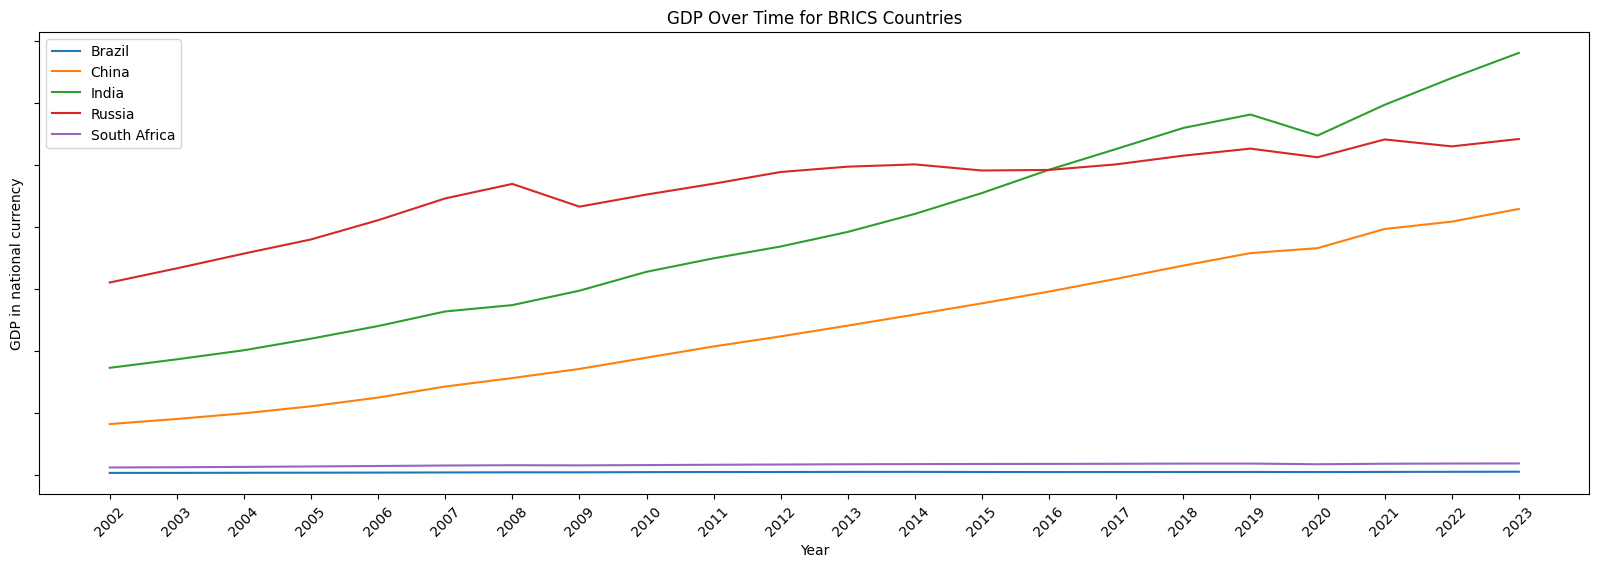

In [15]:
plt.figure(figsize=(20, 6))  # Set the size of the plot

# Plotting each country's GDP
for country in gdp_year['Country'].unique():
    country_data = gdp_year[gdp_year['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP'])
plt.gca().yaxis.set_ticklabels([])
plt.xlabel('Year')
plt.ylabel('GDP in national currency')  # Assuming all rows have the same units
plt.title('GDP Over Time for BRICS Countries')
plt.legend(gdp_year['Country'].unique())
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [17]:
#  sorted by country and year for correct calculation
gdp_year = gdp_year.sort_values(by=['Country', 'Year'])

# Calculate GDP growth rate
gdp_year['gdp_growth'] = gdp_year.groupby('Country')['GDP'].pct_change() * 100

# to remove NaN values which appear for the first year of each country
gdp_year.dropna(subset=['gdp_growth'], inplace=True)

gdp_year


,Country,Units,Year,GDP,gdp_growth
10,Brazil,National currency,2004,877.477,5.759876
15,Brazil,National currency,2005,905.575,3.202135
20,Brazil,National currency,2006,941.453,3.961903
25,Brazil,National currency,2007,998.598,6.069873
30,Brazil,National currency,2008,1049.470,5.094342
...,...,...,...,...,...
89,South Africa,National currency,2019,4583.670,0.260074
94,South Africa,National currency,2020,4310.330,-5.963344
99,South Africa,National currency,2021,4513.040,4.702888
104,South Africa,National currency,2022,4599.260,1.910464


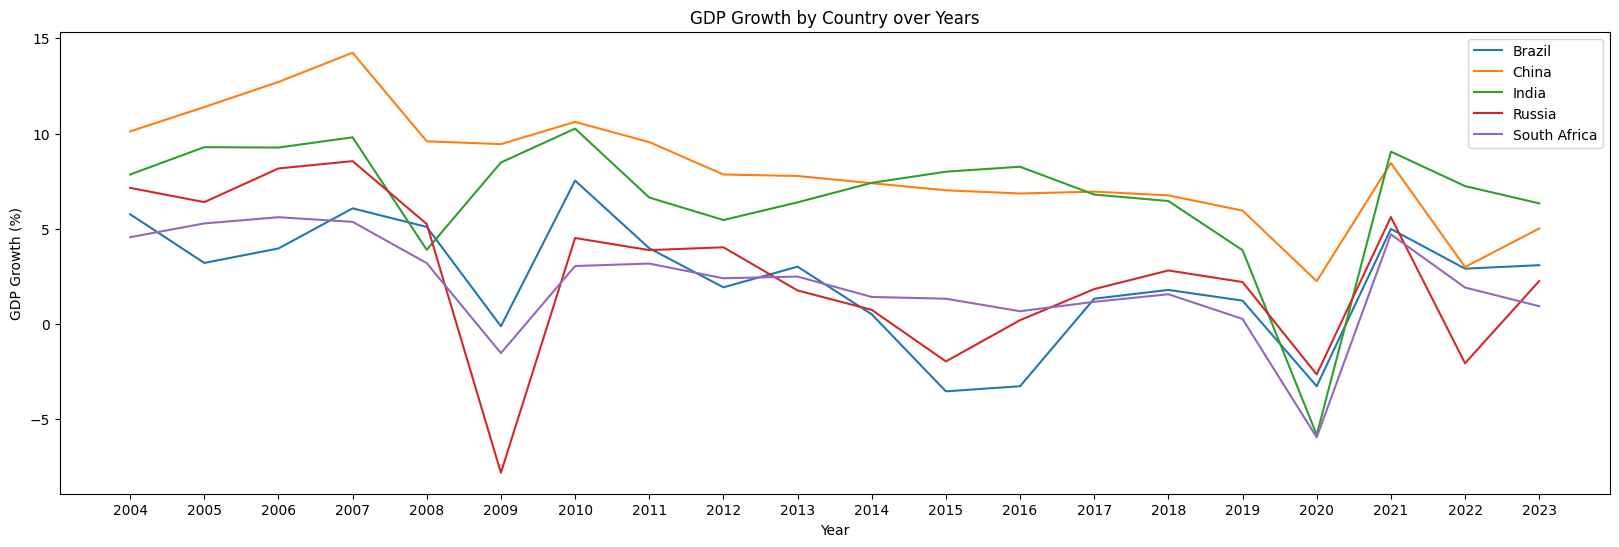

In [21]:
plt.figure(figsize=(20, 6))  # Set the size of the plot
unique_countries = gdp_year['Country'].unique()
for country in unique_countries:
    country_data = gdp_year[gdp_year['Country'] == country]
    plt.plot(country_data['Year'], country_data['gdp_growth'], label=country)

plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.title('GDP Growth by Country over Years')
plt.legend()
plt.show()

#### Inflation rates

Inflation measured by consumer price index (CPI) is defined as the change in the prices of a basket of goods and services that are typically purchased by specific groups of households. Inflation is measured in terms of the annual growth rate and in index, 2015 base year with a breakdown for food, energy and total excluding food and energy. Inflation measures the erosion of living standards. A consumer price index is estimated as a series of summary measures of the period-to-period proportional change in the prices of a fixed set of consumer goods and services of constant quantity and characteristics, acquired, used or paid for by the reference population. Each summary measure is constructed as a weighted average of a large number of elementary aggregate indices. Each of the elementary aggregate indices is estimated using a sample of prices for a defined set of goods and services obtained in, or by residents of, a specific region from a given set of outlets or other sources of consumption goods and services.

https://data.oecd.org/price/inflation-cpi.htm

In [22]:
file_path2 = '/home/ana/code/nusero92/cryptocurency/Data/inflation_rates.csv'
inflation=pd.read_csv(file_path2)

inflation=inflation.drop("Flag Codes", axis=1)
inflation

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,BRA,CPI,FOOD,AGRWTH,A,2018,0.870314
1,BRA,CPI,TOT,AGRWTH,A,2018,3.664850
2,BRA,CPI,TOT,AGRWTH,A,2019,3.732976
3,BRA,CPI,TOT,AGRWTH,A,2020,3.211768
4,BRA,CPI,TOT,AGRWTH,A,2021,8.301660
...,...,...,...,...,...,...,...
69,RUS,CPI,TOT_FOODENRG,AGRWTH,A,2018,2.971667
70,RUS,CPI,TOT_FOODENRG,AGRWTH,A,2019,3.820000
71,RUS,CPI,TOT_FOODENRG,AGRWTH,A,2020,3.010833
72,RUS,CPI,TOT_FOODENRG,AGRWTH,A,2021,5.456666


In [23]:
inflation.transpose()

,0,1,2,3,4,...,69,70,71,72,73
LOCATION,BRA,BRA,BRA,BRA,BRA,...,RUS,RUS,RUS,RUS,IND
INDICATOR,CPI,CPI,CPI,CPI,CPI,...,CPI,CPI,CPI,CPI,CPI
SUBJECT,FOOD,TOT,TOT,TOT,TOT,...,TOT_FOODENRG,TOT_FOODENRG,TOT_FOODENRG,TOT_FOODENRG,FOOD
MEASURE,AGRWTH,AGRWTH,AGRWTH,AGRWTH,AGRWTH,...,AGRWTH,AGRWTH,AGRWTH,AGRWTH,AGRWTH
FREQUENCY,A,A,A,A,A,...,A,A,A,A,A
TIME,2018,2018,2019,2020,2021,...,2018,2019,2020,2021,2018
Value,0.870314,3.66485,3.732976,3.211768,8.30166,...,2.971667,3.82,3.010833,5.456666,1.252763


#### Foreign exchange reserves

#### Financial stability indicatiors

### Government Policies and Regulations

Data Sources: Government websites, policy documents, official statements.

Data Points: Existing regulations on cryptocurrencies, digital economy policies, central bank statements.

Purpose: To understand the legal and regulatory environment, which directly impacts the feasibility of cryptocurrency adoption.

#### Regulations on cryptocurrency

#### Digital economy policies

#### Central bank statments

### Technological Infrastructure

Data Sources: IT industry reports, government tech reports, global technology indexes.

Data Points: Internet penetration rates, digital literacy levels, existing blockchain initiatives.

Purpose: To evaluate the technological readiness of each nation for adopting and supporting a digital currency.

#### Internet penetration rates

#### Digital literacy levels

#### Existing blockchain initiatives

### Public Sentiment and Awareness

Data Sources: Social media platforms, news outlets, public surveys.

Data Points: Public opinion on cryptocurrencies, awareness levels, perceived trust in digital currencies.

Purpose: To gauge the public's readiness and willingness to accept a new form of currency.

### Historical Cryptocurrency Data

Data Sources: Cryptocurrency exchanges, financial news websites.

Data Points: Cryptocurrency prices, trading volumes, market capitalization.

Purpose: To understand the existing cryptocurrency market dynamics and how they are perceived or utilized in BRICS nations.

#### Cryptocurrency prices

#### Traiding volumes

#### Market capitalization

### International Trade and Relations

Data Sources: Trade statistics, international relations research.

Data Points: Trade volumes among BRICS, dependency on the US dollar, existing trade agreements.

Purpose: To explore how intra-BRICS trade and international relations might influence a collective move towards cryptocurrency.

#### Trade volumes among BRICS

#### Dependecy on US dollar

#### Existing trade agreements

## Data preprocessing

## Exploratory Data Analysis

## Model development

## Model evaluation

## Interpretation and reporting

## Deployment and Monitoring